<a href="https://colab.research.google.com/github/afykingsss/ML/blob/main/KNN_Klasifikasi_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics



In [5]:
df=pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [6]:
X = df.iloc[:,1:]  #independent columns
y = df.iloc[:,0]    #target column i.e status

In [7]:
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [8]:
print(model.feature_importances_)

[0.04291608 0.02428747 0.00366578 0.20581832 0.02693588 0.01105017
 0.01722088 0.01866988 0.02822848 0.02232692 0.00648416 0.00889086
 0.01531739 0.06753006 0.07329532 0.08896411 0.0249449  0.02147973
 0.12329435 0.07396661 0.09471265]


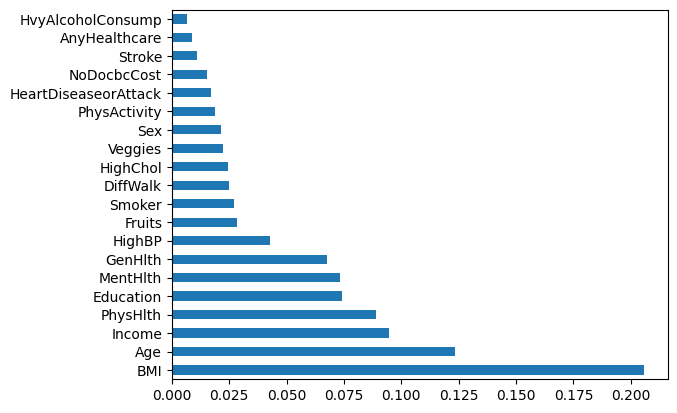

In [9]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [10]:
df=df.drop(['HighChol','DiffWalk','Veggies','Sex','PhysActivity','HeartDiseaseorAttack','NoDocbcCost','Stroke','AnyHealthcare','HvyAlcoholConsump'],axis=1)

In [11]:
df.head(10)

,Diabetes_012,HighBP,CholCheck,BMI,Smoker,Fruits,GenHlth,MentHlth,PhysHlth,Age,Education,Income
0,0.0,1.0,1.0,40.0,1.0,0.0,5.0,18.0,15.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,3.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,28.0,0.0,1.0,5.0,30.0,30.0,9.0,4.0,8.0
3,0.0,1.0,1.0,27.0,0.0,1.0,2.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,24.0,0.0,1.0,2.0,3.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,25.0,1.0,1.0,2.0,0.0,2.0,10.0,6.0,8.0
6,0.0,1.0,1.0,30.0,1.0,0.0,3.0,0.0,14.0,9.0,6.0,7.0
7,0.0,1.0,1.0,25.0,1.0,0.0,3.0,0.0,0.0,11.0,4.0,4.0
8,2.0,1.0,1.0,30.0,1.0,1.0,5.0,30.0,30.0,9.0,5.0,1.0
9,0.0,0.0,1.0,24.0,0.0,0.0,2.0,0.0,0.0,8.0,4.0,3.0


In [12]:
X = df.iloc[:, 1:].values
y = df.iloc[:,0].values

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
model = KNeighborsClassifier(n_neighbors=10,weights='uniform',metric='euclidean')
model.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [14]:
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [15]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8398244507516031


In [16]:
#Pengujian Model Dengan Data Yang Belum Pernah Diuji Dan Dilatih Sebelumnya

In [17]:
uji=[[1.0,	1.0,	50.0,	0.0,	1.0,	2.0,	0.0,	0.0,	13.0,	6.0,	2.0],[1.0	,1.0,	30.0,	1.0,	1.0,	5.0,	30.0,	30.0,	9.0,	5.0,	1.0]]

In [18]:
pred=model.predict(uji)
pred

array([2., 0.])

0 = no diabetes 1 = prediabetes 2 = diabetes